# Norway Car Sales project 

## Train LSTM Recurrent Neural Network using Keras and Tensorflow

In [1]:
import tensorflow as tf
import pandas
import matplotlib.pyplot as plt
import numpy
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# fix random seed for reproducibility
numpy.random.seed(7)

Using TensorFlow backend.


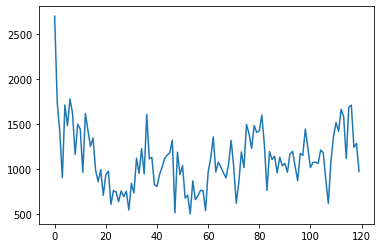

In [2]:
# load the dataset
dataframe = pandas.read_csv('MSCI334_Toyota_Data.csv', usecols=[1],engine='python')
plt.plot(dataframe)
plt.show()

dataset = dataframe.values

# floats are more suitable for neural networks than ints
dataset = dataset.astype('float32')

In [3]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [4]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))


80 40


In [5]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
# reshape train and test datasets into X=t and Y=t+1
look_back = 6
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [28]:
numpy.shape(trainX)

(73, 6, 1)

In [7]:
# Current shape of trainX/testX = [samples, features] = [array of [array of features] = samples]
# Reshape input to be [samples, time steps, features] to feed into LSTM
# Here, we are reshaping trainX to have 3 dimensions, where the 1st dimension represents # of samples,
#   the second dimension is the number of timesteps that comprise the problem (# of values in a given lookback), and the
#   the third dimension represents the number of input features being fed into the model
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [8]:
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))

In [9]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [10]:
# outer loop of epochs to leverage LSTM statefulness
num_epochs = 400
for i in range(num_epochs):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()


Epoch 1/1
 - 2s - loss: 0.0245
Epoch 1/1
 - 1s - loss: 0.0231
Epoch 1/1
 - 1s - loss: 0.0217
Epoch 1/1
 - 1s - loss: 0.0209
Epoch 1/1
 - 1s - loss: 0.0205
Epoch 1/1
 - 1s - loss: 0.0201
Epoch 1/1
 - 2s - loss: 0.0198
Epoch 1/1
 - 1s - loss: 0.0194
Epoch 1/1
 - 1s - loss: 0.0190
Epoch 1/1
 - 1s - loss: 0.0187
Epoch 1/1
 - 1s - loss: 0.0183
Epoch 1/1
 - 1s - loss: 0.0179
Epoch 1/1
 - 2s - loss: 0.0175
Epoch 1/1
 - 1s - loss: 0.0171
Epoch 1/1
 - 1s - loss: 0.0168
Epoch 1/1
 - 1s - loss: 0.0164
Epoch 1/1
 - 1s - loss: 0.0161
Epoch 1/1
 - 1s - loss: 0.0158
Epoch 1/1
 - 1s - loss: 0.0155
Epoch 1/1
 - 1s - loss: 0.0152
Epoch 1/1
 - 1s - loss: 0.0150
Epoch 1/1
 - 2s - loss: 0.0148
Epoch 1/1
 - 2s - loss: 0.0147
Epoch 1/1
 - 1s - loss: 0.0145
Epoch 1/1
 - 1s - loss: 0.0144
Epoch 1/1
 - 1s - loss: 0.0143
Epoch 1/1
 - 1s - loss: 0.0142
Epoch 1/1
 - 1s - loss: 0.0141
Epoch 1/1
 - 1s - loss: 0.0140
Epoch 1/1
 - 1s - loss: 0.0139
Epoch 1/1
 - 1s - loss: 0.0138
Epoch 1/1
 - 1s - loss: 0.0137
Epoch 1/

 - 1s - loss: 0.0097
Epoch 1/1
 - 1s - loss: 0.0096
Epoch 1/1
 - 1s - loss: 0.0096
Epoch 1/1
 - 1s - loss: 0.0095
Epoch 1/1
 - 1s - loss: 0.0096
Epoch 1/1
 - 1s - loss: 0.0097
Epoch 1/1
 - 1s - loss: 0.0097
Epoch 1/1
 - 1s - loss: 0.0096
Epoch 1/1
 - 1s - loss: 0.0096
Epoch 1/1
 - 1s - loss: 0.0096
Epoch 1/1
 - 1s - loss: 0.0097
Epoch 1/1
 - 1s - loss: 0.0097
Epoch 1/1
 - 1s - loss: 0.0097
Epoch 1/1
 - 1s - loss: 0.0096
Epoch 1/1
 - 1s - loss: 0.0096
Epoch 1/1
 - 1s - loss: 0.0096
Epoch 1/1
 - 1s - loss: 0.0097
Epoch 1/1
 - 1s - loss: 0.0097
Epoch 1/1
 - 1s - loss: 0.0097
Epoch 1/1
 - 1s - loss: 0.0096
Epoch 1/1
 - 1s - loss: 0.0096
Epoch 1/1
 - 1s - loss: 0.0096
Epoch 1/1
 - 1s - loss: 0.0097
Epoch 1/1
 - 1s - loss: 0.0097
Epoch 1/1
 - 1s - loss: 0.0096
Epoch 1/1
 - 1s - loss: 0.0096
Epoch 1/1
 - 1s - loss: 0.0096
Epoch 1/1
 - 1s - loss: 0.0096
Epoch 1/1
 - 1s - loss: 0.0097
Epoch 1/1
 - 1s - loss: 0.0097
Epoch 1/1
 - 1s - loss: 0.0096
Epoch 1/1
 - 1s - loss: 0.0096
Epoch 1/1
 - 1s - 

In [11]:
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
testPredict = model.predict(testX, batch_size=batch_size)



In [12]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])



In [27]:
# calculate root mean squared error
# trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
# print('Train Score: %.2f RMSE' % (trainScore))
# testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
# print('Test Score: %.2f RMSE' % (testScore))

print('Training Set Error: ')

# calculate mean squared error
trainMse = mean_squared_error(trainY[0], trainPredict[:,0])
print('Mean Squared Error: %.2f MSE' % (trainMse))

# calculate root mean squared error
trainRmse = math.sqrt(trainMse)
print('Root Mean Squared Error: %.2f RMSE' % (trainRmse))

# calculate mean absolute error
trainMae = mean_absolute_error(trainY[0], trainPredict[:,0])
print('Mean Absolute Error: %.2f MAE' % (trainMae))

# calculate mean absolute percentage error
trainMape = numpy.mean(numpy.abs((trainY[0] - trainPredict[:,0]) / trainY[0])) * 100
print('Mean Absolute Percentage Error: %.2f %% MAPE' % (trainMape))

print('Test Set Error: ')

# calculate mean squared error
testMse = mean_squared_error(testY[0], testPredict[:,0])
print('Mean Squared Error: %.2f MSE' % (testMse))

# calculate root mean squared error
testRmse = math.sqrt(testMse)
print('Root Mean Squared Error: %.2f RMSE' % (testRmse))

# calculate mean absolute error
testMae = mean_absolute_error(testY[0], testPredict[:,0])
print('Mean Absolute Error: %.2f MAE' % (testMae))

# calculate mean absolute percentage error
testMape = numpy.mean(numpy.abs((testY[0] - testPredict[:,0]) / testY[0])) * 100
print('Mean Absolute Percentage Error: %.2f %% MAPE' % (testMape))


Training Set Error: 
Mean Squared Error: 42840.58 MSE
Root Mean Squared Error: 206.98 RMSE
Mean Absolute Error: 160.56 MAE
Mean Absolute Percentage Error: 17.84 % MAPE
Test Set Error: 
Mean Squared Error: 94132.61 MSE
Root Mean Squared Error: 306.81 RMSE
Mean Absolute Error: 235.91 MAE
Mean Absolute Percentage Error: 18.67 % MAPE


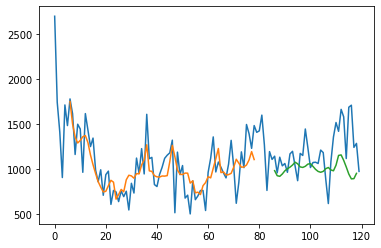

In [14]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()




## Save the Keras + Tensorflow RNN

In [15]:
# save model and architecture to single file
model.save("norwayCarRNN.h5")

## Forecast for 2017

In [16]:
# load the actual 2017 data
dataframe_2017 = pandas.read_csv('MSCI334_2017_Toyota_Sales.csv', usecols=[1],engine='python')
dataset_2017 = dataframe_2017.values
dataset_2017 = dataset_2017.astype('float32')

# normalize the dataset
dataset_2017 = scaler.fit_transform(dataset_2017)

## Create the prediction and validation datasets

forecasted sales for 2017 will be predicted by using the prediction dataset, and error will be measured using the validation dataset


In [17]:
# Set up the datasets such that the RNN will predict the next month of sales based on previous 6 months
look_back = 6
inputs, targets = create_dataset(dataset_2017, look_back)

In [18]:
# Reshape input to be [samples, time steps, features] to feed into LSTM
inputs = numpy.reshape(inputs, (inputs.shape[0], inputs.shape[1], 1))

## Make predictions

In [19]:
# make predictions
predictions = model.predict(inputs, batch_size=batch_size)

# invert the normalization done on predictions and targets sets to properly calculate error
predictions = scaler.inverse_transform(predictions)
targets = scaler.inverse_transform([targets])

## Error testing

In [20]:
from sklearn.metrics import mean_absolute_error

In [21]:
# calculate mean squared error
mse = mean_squared_error(targets[0], predictions[:,0])
print('Mean Squared Error: %.2f MSE' % (mse))

# calculate root mean squared error
rmse = math.sqrt(mse)
print('Root Mean Squared Error: %.2f RMSE' % (rmse))

# calculate mean absolute error
mae = mean_absolute_error(targets[0], predictions[:,0])
print('Mean Absolute Error: %.2f MAE' % (mae))

# calculate mean absolute percentage error
mape = numpy.mean(numpy.abs((targets[0] - predictions[:,0]) / targets[0])) * 100
print('Mean Absolute Percentage Error: %.2f %% MAPE' % (mape))

Mean Squared Error: 80832.91 MSE
Root Mean Squared Error: 284.31 RMSE
Mean Absolute Error: 241.22 MAE
Mean Absolute Percentage Error: 16.65 % MAPE


## Plotting the forecasted results

In [22]:
# invert the scaling transformation on the 2017 dataset
dataset_2017 = scaler.inverse_transform(dataset_2017)

In [23]:
# read in entire dataset with datapoints including 2017
totaldf = pandas.read_csv('toyota_sales_total.csv', usecols=[1],engine='python')
totalData = totaldf.values
# floats are more suitable for neural networks than ints
totalData = totalData.astype('float32')

## Actual Sales (blue line) vs Predicted Sales

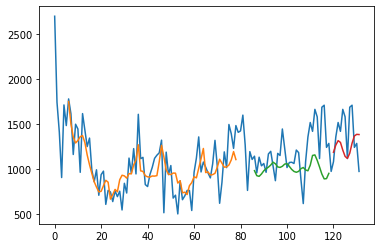

In [24]:
# shift predictions for plotting
predictionsPlot = numpy.empty_like(totalData)
predictionsPlot[:, :] = numpy.nan
predictionsPlot[len(dataset):len(totalData), :] = predictions
plt.plot(totalData)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.plot(predictionsPlot)
plt.show()


## 2017 Sales vs Predicted Sales

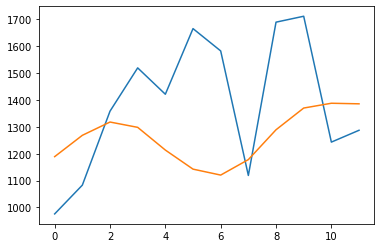

In [25]:
dataset_2017plot = numpy.empty_like(targets[0])
dataset_2017plot[:] = numpy.nan
dataset_2017plot[:] = predictions[:,0]
plt.plot(targets[0])
plt.plot(dataset_2017plot)
plt.show()

In [26]:
print(predictions[:,0])

[1188.9723 1268.2384 1317.6387 1297.8934 1213.4333 1142.501  1120.3951
 1177.9677 1288.8894 1369.6537 1387.5077 1385.3544]
